# Python for Machine Learning

### *Session \#2*


### Helpful shortcuts
---

**SHIFT** + **ENTER** ----> Execute Cell

**UP/DOWN ARROWS** --> Move cursor between cells (then ENTER to start typing)

**TAB** ----> See autocomplete options

**ESC** then **b** ----> Create Cell 

**ESC** then **dd** ----> Delete Cell

**\[python expression\]?** ---> Explanation of that Python expression

**ESC** then **m** then __ENTER__ ----> Switch to Markdown mode

## I. Review and Yellowbrick

### Warm Ups

*Type the given code into the cell below*

---

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.classifier import ConfusionMatrix, ClassPredictionError

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

df = pd.read_excel('titanic.xlsx')

**Create feature matrix/target vector:**
```python
columns = ['fare', 'pclass']
X = df[columns]
y = df['alive']
```                    

In [2]:
columns = ['fare', 'pclass']
X = df[columns]
y = df['alive']

**Create train/test split:**
```python
X_train, X_test, y_train, y_test = train_test_split(X, y)
```

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

**Create model:**
```python
model = KNeighborsClassifier(n_neighbors=3)
```                    

In [4]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6502242152466368

**Confusion Matrix:**
```python
model_cm = ConfusionMatrix(model)
model_cm.fit(X_train, y_train)
model_cm.score(X_test, y_test)
model_cm.finalize()
```                    



0.6502242152466368


/Users/patrick/miniconda3/envs/python_for_data_science/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


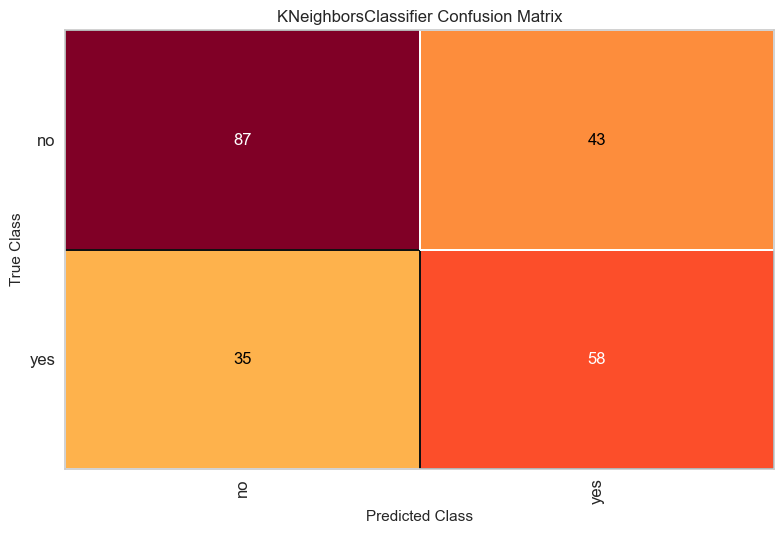

In [5]:
model_cm = ConfusionMatrix(model)
model_cm.fit(X_train, y_train)
print(model_cm.score(X_test, y_test))
model_cm.finalize()

### Exercises
---
**1. Train the model using only** `fare, sibsp, pclass` **in the feature matrix, with** `survived` **as the target vector**

In [6]:
columns = ['fare', 'sibsp', 'pclass']
X = df[columns]
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

**2. Plot a confusion matrix for the model. What is the accuracy? Sensitivity?**

0.6367713004484304
Same as 0.5829596412556054

Sensitity in predicting status as alive: 0.42105263157894735


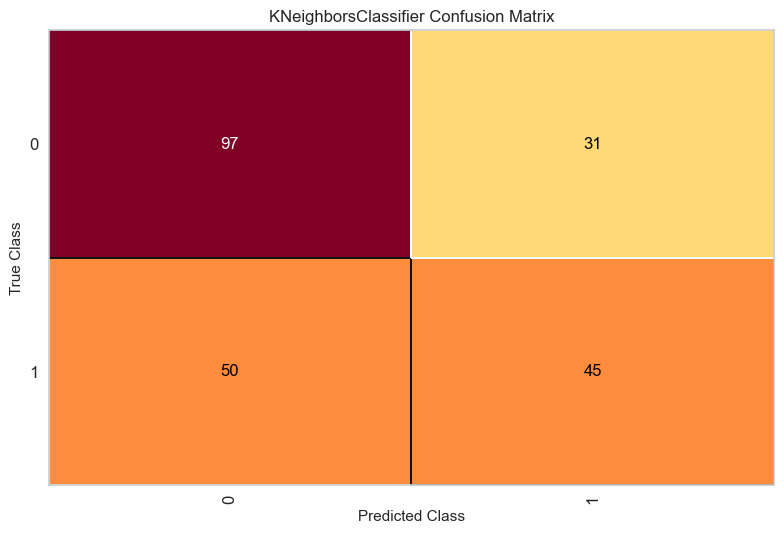

In [7]:
model_cm = ConfusionMatrix(KNeighborsClassifier(n_neighbors=3))
model_cm.fit(X_train, y_train)

#Accuracy:
print(model_cm.score(X_test, y_test))
print('Same as ' + str((90. + 40.) / (90. + 38. + 55. + 40.)))

#Sensitivity:
print('\nSensitity in predicting status as alive: ' + 
      str(40./(55.+40.)))

model_cm.finalize()

**3. An alternate form of the confusion matrix is the class prediction error graph.**

**Redo the steps for a confusion matrix, but wrap your model with** `ClassPredictionError()` **instead.**

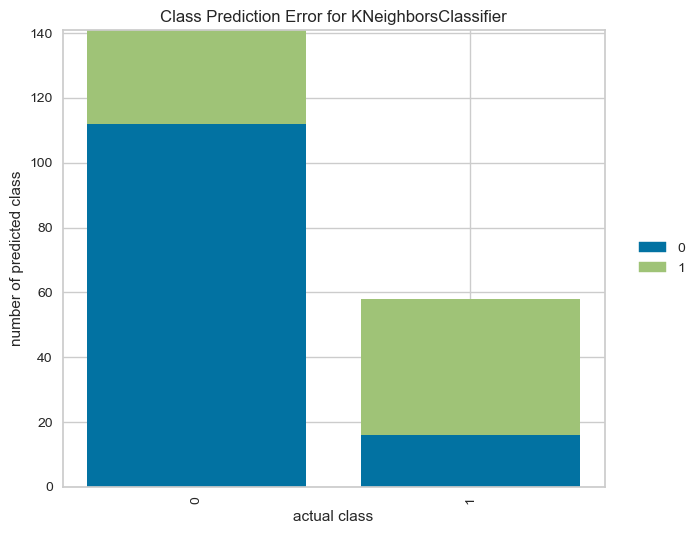

In [8]:
model_cm = ClassPredictionError(KNeighborsClassifier(n_neighbors=8))
model_cm.fit(X_train, y_train)
model_cm.score(X_test, y_test)
model_cm.finalize()

**4. Use** `model_cm.predict()` **on the two new samples below.**

In [9]:
new_samples = pd.DataFrame([[120, 2, 1], [25, 1, 3]], 
                           columns=['fare', 'sibsp', 'pclass'])

model_cm.predict(new_samples)

array([1, 0])

**5. You can use** `model_cm.predict_proba()` **to get the probability the model gives to each class instead.**

**Use** `.predict_proba()` **on the new samples. Which passenger is the model more certain about?**

In [10]:
model_cm.predict_proba(new_samples)

array([[0.125, 0.875],
       [0.75 , 0.25 ]])

## II. Missing Data

### Warm Ups

*Type the given code into the cell below*

---

**Find rows with null age:**
```python
null_age = df['age'].isnull()
df[null_fare]
```


In [11]:
null_age = df['age'].isnull()
df[null_age]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


**Drop rows with nulls:**`df.dropna(subset=['age'])`                    
*Hint: You can also set* `inplace=True` *to change the original dataframe*


In [12]:
df.dropna(subset=['age'])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


**Find count of nulls:**`df.isnull().sum()`                    



In [13]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

**Find percentage of nulls:**`df.isnull().mean()`                    



In [14]:
df.isnull().mean()

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

**Fill in nulls based on filter:**
```python
df.loc[null_age, 'age'] = df['age'].mean()
```

In [15]:
df[null_age]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [16]:
df.loc[null_age, 'age'] = df['age'].mean()

In [17]:
df[null_age]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,29.699118,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,29.699118,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,29.699118,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,29.699118,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,29.699118,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,29.699118,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,29.699118,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,29.699118,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


### Exercises
---

**1. Find all the rows where** `deck` **is null.**

In [18]:
null_deck = df['deck'].isnull()

df[null_deck]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.000000,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.000000,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.000000,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


**2. How many nulls are there in the** `age` **column? The** `embarked` **column?** 

In [19]:
nulls = df.isnull().sum()

print(nulls['age'])
print(nulls['embarked'])

0
2


**3. Find the percentage of nulls across all columns. For columns with <5% nulls, drop rows the rows with missing values.**

In [20]:
df.isnull().mean()

df.dropna(subset=['embarked', 'embark_town'], inplace=True)

**4. Drop columns with more than 50% nulls.**

In [21]:
df.drop(columns=['deck'], inplace=True)

**5. Fill in the age nulls by taking the average age across the** `who` **column**

**So, men with nulls would get the average age of people with** `man` **in the** `who` **column, children with nulls would get the average age of people with** `child` **in the** `who` **column**

In [22]:
child = df['who'] == 'child'
df.loc[child, 'age'] = df[child]['age'].mean()

man = df['who'] == 'man'
df.loc[man, 'age'] = df[man]['age'].mean()

woman = df['who'] == 'woman'
df.loc[woman, 'age'] = df[woman]['age'].mean()

## III. Scaling and One-Hot Encoding

### Warm Ups

*Type the given code into the cell below*

---

**Imports for One-Hot Encoding and Pipelines:**

In [23]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

**Add encoding to model using pipeline:**
```python
model = make_pipeline(OneHotEncoder(), KNeighborsClassifier(3))
```

In [24]:
model = make_pipeline(OneHotEncoder(), KNeighborsClassifier(3))

**Add StandardScaler to model using pipeline:**
```python
model = make_pipeline(StandardScaler(), KNeighborsClassifier(3))
```

In [25]:
model = make_pipeline(StandardScaler(), KNeighborsClassifier(3))

**Split pipeline between two types of columns:**
```python
numeric = ['fare', 'age']
categorical = ['pclass', 'embark_town', 'who']

column_transformer = make_column_transformer(
        (StandardScaler(), numeric),
        (OneHotEncoder(), categorical)
    )

model = make_pipeline(column_transformer, KNeighborsClassifier(3))
```

In [26]:
numeric = ['fare', 'age']
categorical = ['pclass', 'embark_town', 'who']

column_transformer = make_column_transformer(
        (StandardScaler(), numeric),
        (OneHotEncoder(), categorical)
    )

model = make_pipeline(column_transformer, KNeighborsClassifier(3))

### Exercises
---

**1. Create a new feature matrix X by dropping the** `alive` **and** `survived` **columns of** `df` 

**Then create** `X_num` **with just the numeric inputs and** `X_cat` **with just categorical data**

Hint: You can use `df.select_dtypes()` to isolate the categorical (ie. 'object') columns and numeric columns (ie. 'int64', 'float64')

In [27]:
def assign_tts(model, typ, state=None):
    '''
    Take a model meant to make survival predictions from `df`, and split up the
    data into a training set and a testing set. Insert these sets into the
    model itself as attributes so it's easy to call the data that the model
    uses.
        E.g. model.X_train = tts[0]
             print(model.X_train)
    '''
    X = df.drop(columns=['alive', 'survived'])
    y = df['survived']
    X_num = X.select_dtypes(['int64', 'float64'])
    X_cat = X.select_dtypes(['object'])
    if typ=='cat':
        tts = train_test_split(X_cat, y,
                               random_state=state)
    elif typ=='num':
        tts = train_test_split(X_num, y,
                               random_state=state)
    elif typ=='both':
        tts = train_test_split(X, y,
                               random_state=state)
    else:
        raise ValueError('Unexpected type')
    model.X_train = tts[0]
    model.X_test = tts[1]
    model.y_train = tts[2]
    model.y_test = tts[3]
    return None
def std_train(model, yb_wrapper=None):
    model.fit(model.X_train, model.y_train)
    return None
def std_score(model, yb_wrapper=None):
    s = model.score(model.X_test, model.y_test)
    return s

**2. Create a** `OneHotEncoder(sparse=False)` **object as** `encoder` **and call** `encoder.fit_transform()` **on the categorical columns of X to get an inside look into what the model sees when we wrap it with `OneHotEncoder`.**

Note: The `sparse=False` parameter makes the output a normal Numpy array

In [28]:
encoder = OneHotEncoder(sparse=False)
encoder.fit_transform(df.drop(columns=['alive', 
                                       'survived']).select_dtypes(['object']))
# Remember that we want to drop 'alive' and 'survived' from the feature matrix
# because those are the
# independent variable; we only want to one-hot encode features.

array([[0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

**3. Create a model based on only the categorical features of X. Fit the model to the data, and find the model's accuracy.**

Hint: Use a pipeline and OneHotEncoder()

In [29]:
modelIII3 = make_pipeline(OneHotEncoder(), KNeighborsClassifier(3))
assign_tts(modelIII3, typ='cat', state=None)
std_train(modelIII3)
std_score(modelIII3)

0.7802690582959642

**4. Create a model based on only the numeric features of X, which preprocesses data using StandardScaler(). Fit the model to the data, and find the accuracy.**

In [30]:
X_numIII4 = df.drop(columns=['alive', 
                             'survived']).select_dtypes(['int64',
                                                         'float64'])
scaler = StandardScaler()
scaler.fit(X_numIII4)
scaler.transform(X_numIII4)

array([[ 0.82520863,  0.36309554,  0.43135024, -0.47432585, -0.50023975],
       [-1.57221121,  0.23508016,  0.43135024, -0.47432585,  0.78894661],
       [ 0.82520863,  0.23508016, -0.47519908, -0.47432585, -0.48664993],
       ...,
       [ 0.82520863,  0.23508016,  0.43135024,  2.00611934, -0.17408416],
       [-1.57221121,  0.36309554, -0.47519908, -0.47432585, -0.0422126 ],
       [ 0.82520863,  0.36309554, -0.47519908, -0.47432585, -0.49017322]])

In [31]:
modelIII4 = make_pipeline(StandardScaler(), KNeighborsClassifier(3))
assign_tts(modelIII4, typ='num', state=None)
std_train(modelIII4)
std_score(modelIII4)

0.6860986547085202

**5. Use a ColumnTransformer to create a model with both** `OneHotEncoder()` **and** `StandardScaler()` **preprocessing for the appropriate columns. What's the accuracy for this combined model?**

In [32]:
XIII5 = df.drop(columns=['alive', 'survived'])

# Get a list of strings that denote the names of columns with numerical data:
X_num_cols = XIII5.select_dtypes(['int64', 'float64']).columns

# Get a list of strings that denote the names of columns with non-numerical 
# data:
X_cat_cols = XIII5.select_dtypes(['object']).columns

# Create a column_transformer that will standardize any column whose name is 
# in the 
# list `X_num_cols` and will one-hot encode and column whose name is in the list
# `X_cat_cols`:
column_transformer = make_column_transformer(
                                  (StandardScaler(), X_num_cols),
                                  (OneHotEncoder(), X_cat_cols)
                                            )

modelIII5 = make_pipeline(column_transformer, KNeighborsClassifier(3))
assign_tts(modelIII5, typ='both')
std_train(modelIII5)
std_score(modelIII5)

0.8071748878923767

**6. You can also combine Yellowbrick visualizers with pipelines!**

**After creating your pipeline with** `make_pipeline()` **, but before fitting to training data, wrap your model with** `ConfusionMatrix()` 

In [33]:
column_transformer

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 Index(['pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')),
                                ('onehotencoder', OneHotEncoder(),
                                 Index(['sex', 'embarked', 'class', 'who', 'embark_town'], dtype='object'))])

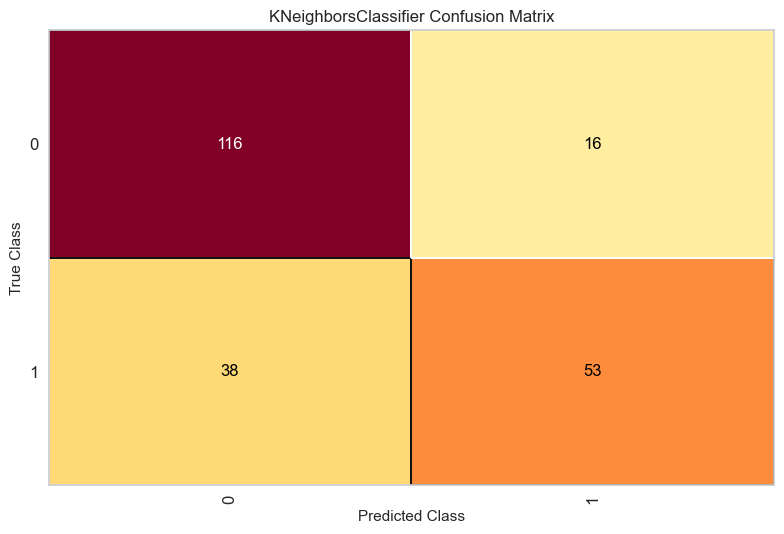

In [34]:
column_transformer = make_column_transformer(
        (StandardScaler(), X_num_cols),
        (OneHotEncoder(), X_cat_cols)
    )

modelIII6 = make_pipeline(column_transformer, KNeighborsClassifier(3))

viz = ConfusionMatrix(modelIII6)
assign_tts(viz, typ='both') # Split data into training and test sets.
std_train(viz)
std_score(viz)
viz.finalize()